In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
import math
from keras.models import Sequential, load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("data/data_hour_v3.csv")

In [3]:
df

,Unnamed: 0,timestamp,Office_Marla,hour
0,0,2014-06-02 00:00:00,10.50,2
1,1,2014-06-02 01:00:00,8.25,1
2,2,2014-06-02 02:00:00,9.00,1
3,3,2014-06-02 03:00:00,9.00,1
4,4,2014-06-02 04:00:00,9.25,1
5,5,2014-06-02 05:00:00,10.25,1
6,6,2014-06-02 06:00:00,9.00,1
7,7,2014-06-02 07:00:00,12.00,1
8,8,2014-06-02 08:00:00,10.50,1
9,9,2014-06-02 09:00:00,9.50,1


In [4]:
# for i in range(len(df)):
# #   平段
#     if df['timestamp'][i].hour >= 11 and df['timestamp'][i].hour <= 13:
#         df['hour'][i] = 2
#     if df['timestamp'][i].hour >= 22 or df['timestamp'][i].hour <= 0:
#         df['hour'][i] = 2
# #   谷段
#     if df['timestamp'][i].hour >= 1 and df['timestamp'][i].hour <= 10:
#         df['hour'][i] = 1
# #   峰段
#     if df['timestamp'][i].hour >= 14 and df['timestamp'][i].hour <= 21:
#         df['hour'][i] = 3

In [5]:
# df.to_csv("C:\\Users\\Administrator\\Desktop\\大三上课程\\深度学习技术\\homeWork\\data_hour_v3.csv")

In [6]:
dataset = df[['Office_Marla']].values
dataset

array([[10.5 ],
       [ 8.25],
       [ 9.  ],
       ...,
       [10.75],
       [10.25],
       [10.5 ]])

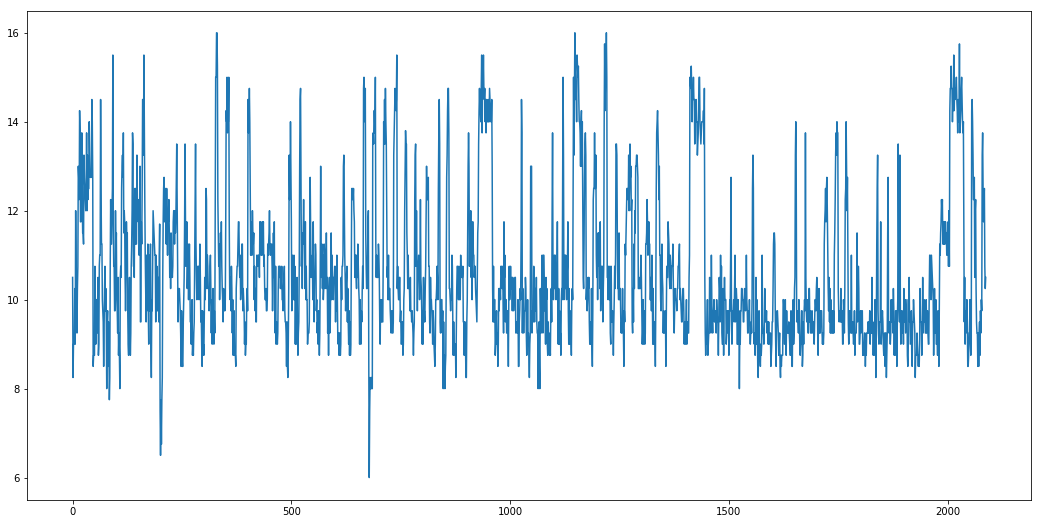

In [7]:
plt.figure(figsize=(18, 9))
plt.plot(dataset)
plt.show()

In [8]:
#归一化
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [9]:
hour = np.array(df['hour'])
hour = np.expand_dims(hour, axis=1)
scalerH = MinMaxScaler(feature_range=(0, 1))
hour = scalerH.fit_transform(hour)
hour

F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.5],
       [0. ],
       [0. ],
       ...,
       [1. ],
       [0.5],
       [0.5]])

In [10]:
dataset = np.hstack((dataset,hour))

train_size = int(len(dataset) * 0.7)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]

In [11]:
def create_dataset(dataset, look_back, out_num):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back - out_num + 1):
        a = dataset[i:(i+look_back)]
        b = dataset[:,0][(i+look_back):(i+look_back+out_num)]
        dataX.append(a)
        dataY.append(b)
    return np.array(dataX),np.array(dataY)

In [12]:
# 用前3个预测后3个
look_back = 3
out_num = 3
trainX,trainY  = create_dataset(trainlist,look_back, out_num)
testX,testY = create_dataset(testlist,look_back, out_num)

In [13]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 2))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1] ,2))

In [14]:
n_steps_in, n_steps_out = look_back, out_num
# 此例中 n features = 2，因为输入有2个并行序列  
n_features = 2

# define model
model = Sequential()
model.add(LSTM(4, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(4, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
model.fit(trainX, trainY, epochs=300, batch_size=1, verbose=2)

Epoch 1/300
1456/1456 - 4s - loss: 0.0381
Epoch 2/300
1456/1456 - 4s - loss: 0.0197
Epoch 3/300
1456/1456 - 5s - loss: 0.0196
Epoch 4/300
1456/1456 - 5s - loss: 0.0191
Epoch 5/300
1456/1456 - 5s - loss: 0.0188
Epoch 6/300
1456/1456 - 5s - loss: 0.0186
Epoch 7/300
1456/1456 - 5s - loss: 0.0184
Epoch 8/300
1456/1456 - 5s - loss: 0.0181
Epoch 9/300
1456/1456 - 6s - loss: 0.0177
Epoch 10/300
1456/1456 - 6s - loss: 0.0174
Epoch 11/300
1456/1456 - 6s - loss: 0.0169
Epoch 12/300
1456/1456 - 6s - loss: 0.0166
Epoch 13/300
1456/1456 - 5s - loss: 0.0161
Epoch 14/300
1456/1456 - 5s - loss: 0.0154
Epoch 15/300
1456/1456 - 6s - loss: 0.0148
Epoch 16/300
1456/1456 - 5s - loss: 0.0144
Epoch 17/300
1456/1456 - 5s - loss: 0.0143
Epoch 18/300
1456/1456 - 6s - loss: 0.0141
Epoch 19/300
1456/1456 - 5s - loss: 0.0139
Epoch 20/300
1456/1456 - 6s - loss: 0.0138
Epoch 21/300
1456/1456 - 5s - loss: 0.0136
Epoch 22/300
1456/1456 - 6s - loss: 0.0136
Epoch 23/300
1456/1456 - 6s - loss: 0.0134
Epoch 24/300
1456/14

Epoch 190/300
1456/1456 - 6s - loss: 0.0113
Epoch 191/300
1456/1456 - 6s - loss: 0.0113
Epoch 192/300
1456/1456 - 6s - loss: 0.0114
Epoch 193/300
1456/1456 - 6s - loss: 0.0113
Epoch 194/300
1456/1456 - 6s - loss: 0.0113
Epoch 195/300
1456/1456 - 6s - loss: 0.0114
Epoch 196/300
1456/1456 - 6s - loss: 0.0113
Epoch 197/300
1456/1456 - 6s - loss: 0.0113
Epoch 198/300
1456/1456 - 6s - loss: 0.0113
Epoch 199/300
1456/1456 - 5s - loss: 0.0114
Epoch 200/300
1456/1456 - 6s - loss: 0.0114
Epoch 201/300
1456/1456 - 6s - loss: 0.0114
Epoch 202/300
1456/1456 - 6s - loss: 0.0115
Epoch 203/300
1456/1456 - 6s - loss: 0.0114
Epoch 204/300
1456/1456 - 6s - loss: 0.0114
Epoch 205/300
1456/1456 - 6s - loss: 0.0113
Epoch 206/300
1456/1456 - 6s - loss: 0.0114
Epoch 207/300
1456/1456 - 5s - loss: 0.0114
Epoch 208/300
1456/1456 - 5s - loss: 0.0114
Epoch 209/300
1456/1456 - 6s - loss: 0.0113
Epoch 210/300
1456/1456 - 6s - loss: 0.0114
Epoch 211/300
1456/1456 - 6s - loss: 0.0114
Epoch 212/300
1456/1456 - 6s - l

In [30]:
# model.save("C:\\Users\\Administrator\\Desktop\\大三上课程\\深度学习技术\\homeWork\\lstm_hour_3.h5")

In [31]:
# model = load_model("model/lstm_hour_3.h5")

In [15]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [16]:
#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY.reshape(trainY.shape[0], trainY.shape[1]))
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY.reshape(testY.shape[0], testY.shape[1]))

In [17]:
def convert(a):
    a1 = np.array([a[:, 0][0]])
    a2 = np.array([(a[:, 0][1] + a[:, 1][0]) / 2])
    a3 = (a[:, 0][2: ] + a[:, 1][1: -1] + a[:, 2][0: -2]) / 3
    a4 = np.array([(a[:, 1][-1] + a[:, 2][-2]) / 2])
    a5 = np.array([a[:, 2][-1]])
    a_last = np.concatenate([a1,a2,a3,a4,a5])
    return a_last

In [18]:
trainPredict = convert(trainPredict)
testPredict = convert(testPredict)
trainY = convert(trainY)
testY = convert(testY)

In [19]:
predict = np.append(trainPredict, testPredict)
y = np.append(trainY, testY)

In [20]:
# 求均方误差(1)  所有一起
trainScore = math.sqrt(mean_squared_error(trainY.flatten(), trainPredict.flatten()))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY.flatten(), testPredict.flatten()))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 0.963 RMSE
Test Score: 1.051 RMSE


In [44]:
trainScore1 = mean_squared_error(trainY.flatten(), trainPredict.flatten())
print('Train Score: %.3f MSE' % (trainScore1))
testScore1 = mean_squared_error(testY.flatten(), testPredict.flatten())
print('Test Score: %.3f MSE' % (testScore1))

Train Score: 0.907 MSE
Test Score: 0.973 MSE


In [43]:
# 求均方误差(2)  使用最终的均值结果
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 0.952 RMSE
Test Score: 0.987 RMSE


## 所有数据

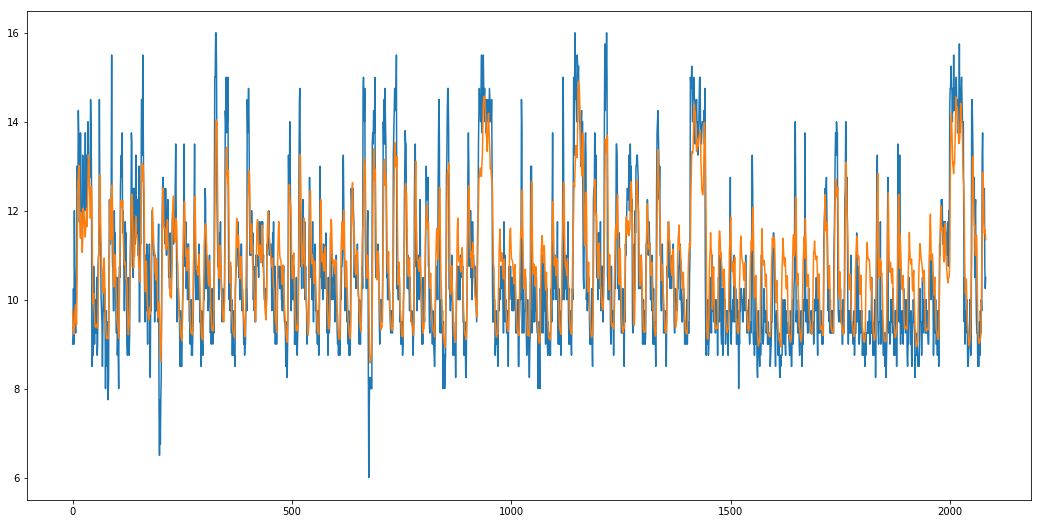

In [21]:
plt.figure(figsize=(18, 9))
plt.plot(y)
plt.plot(predict)
plt.show()

## 训练集

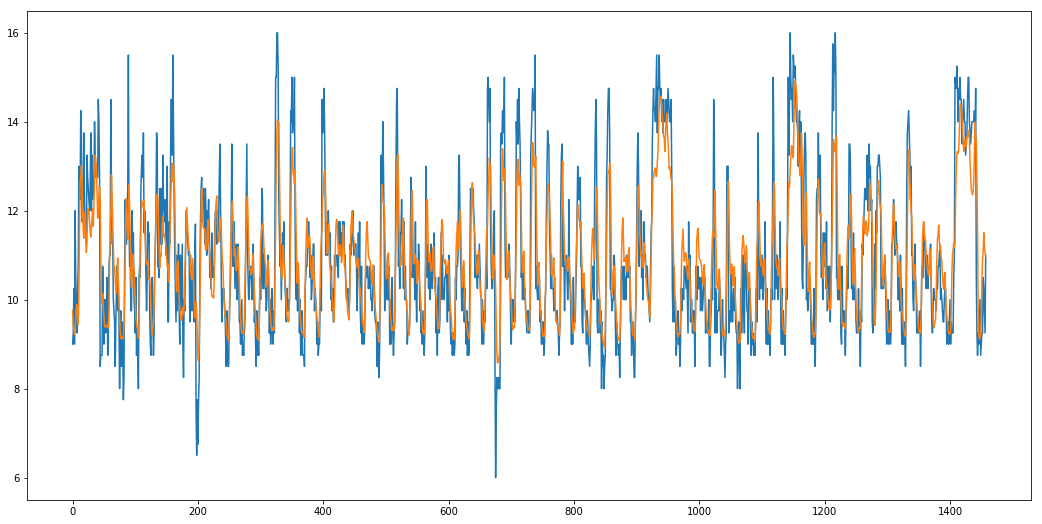

In [22]:
plt.figure(figsize=(18, 9))
plt.plot(trainY)
plt.plot(trainPredict)
plt.show()

## 测试集

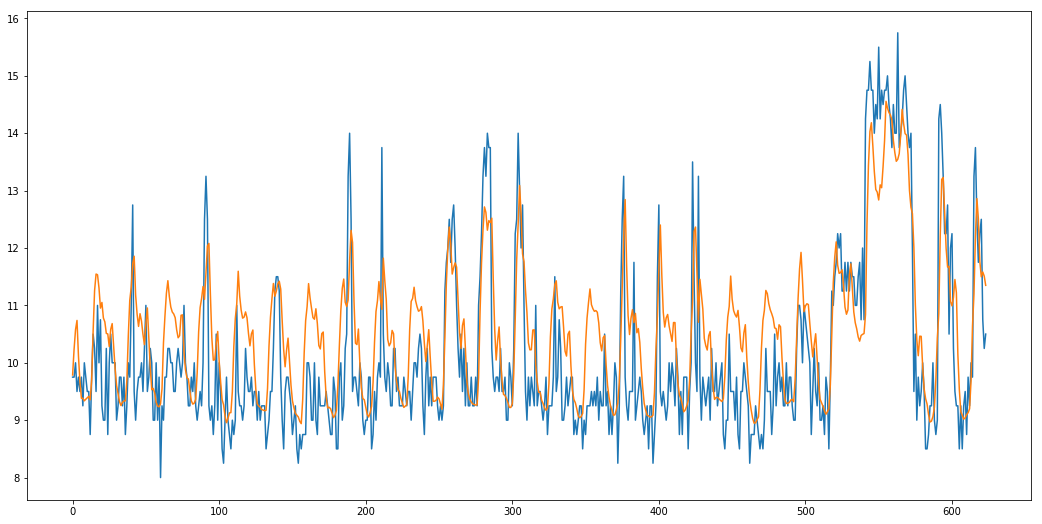

In [23]:
plt.figure(figsize=(18, 9))
plt.plot(testY)
plt.plot(testPredict)
plt.show()

## 前200条数据 （训练集）

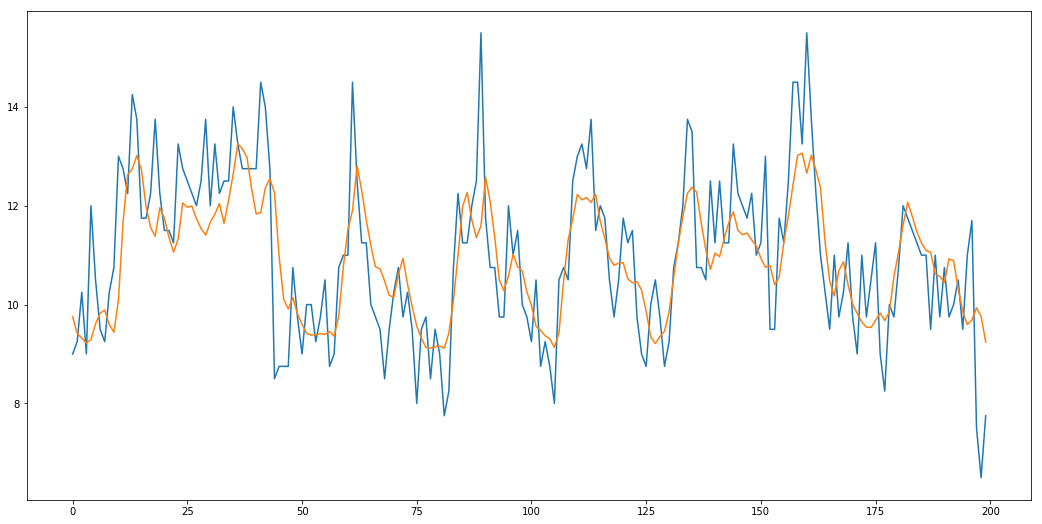

In [24]:
plt.figure(figsize=(18, 9))
plt.plot(y[:200])
plt.plot(predict[:200])
plt.show()

## 后200条数据 （测试集）

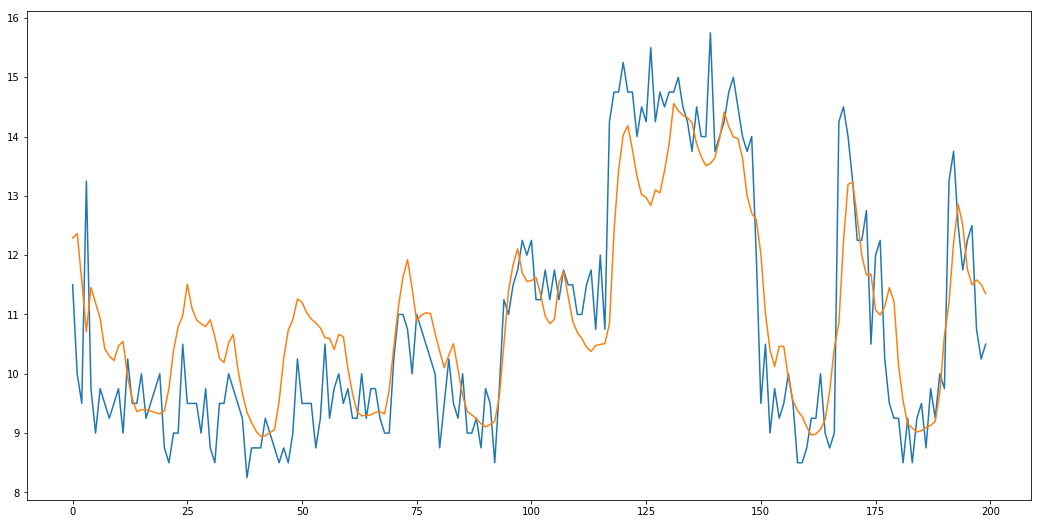

In [25]:
plt.figure(figsize=(18, 9))
plt.plot(y[-200:])
plt.plot(predict[-200:])
plt.show()

## 总体结果 

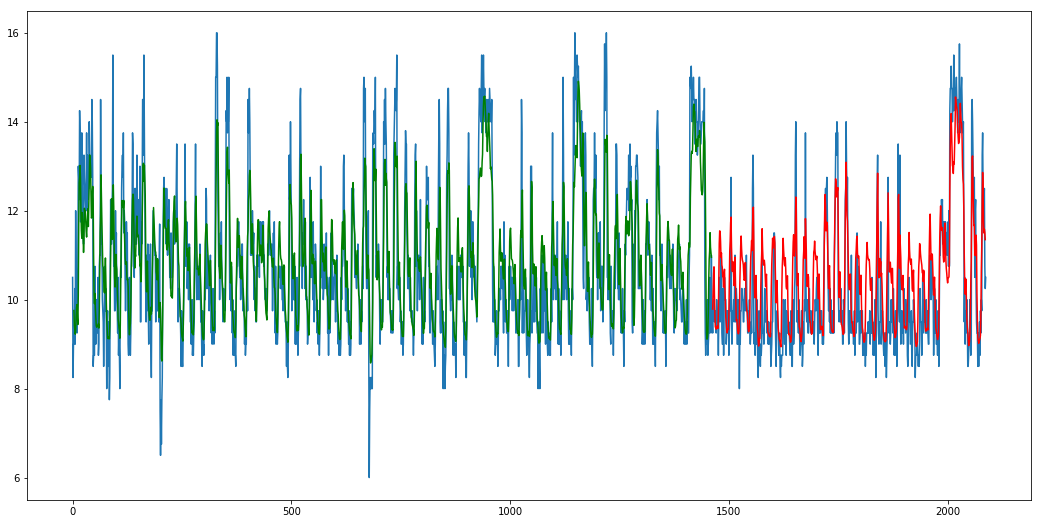

In [26]:
plt.figure(figsize=(18, 9))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset[:,0])
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset[:,0])
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)-1:len(dataset)-1] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset)[:,0])
plt.plot(trainPredictPlot,'g')
plt.plot(testPredictPlot,'r')
plt.show()